<a href="https://colab.research.google.com/github/Augusta02/Machine-Learning-Projects/blob/main/Customer_Segmentation_using_K_Means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation** is the practice of dividing company's customers into groups that reflects similarities among customers in each group. The goal of customers segmentation is to know how to relate to customers in each segment to better maximize value to the business.


***Advantages of Customer Segmentation***

1.   Price Optimization

2.   Enhances Competitiveness

3.   Brand Awareness

4.   Acquisitionand Retention

5.   Increases Revenue and ROI

***Why Machine Learning for this?***

Machine learning models can process customer data and discover patterns difficult to spot through intuition and manual examination of data.

Why K-Means Algorithm

It is a a type of Unsupervised learning. It is an iterative algorithm that divides the unlabelled dataset into k different clusters in such a way that each dataset belongs only to one group that has similar properties.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
uploaded= files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

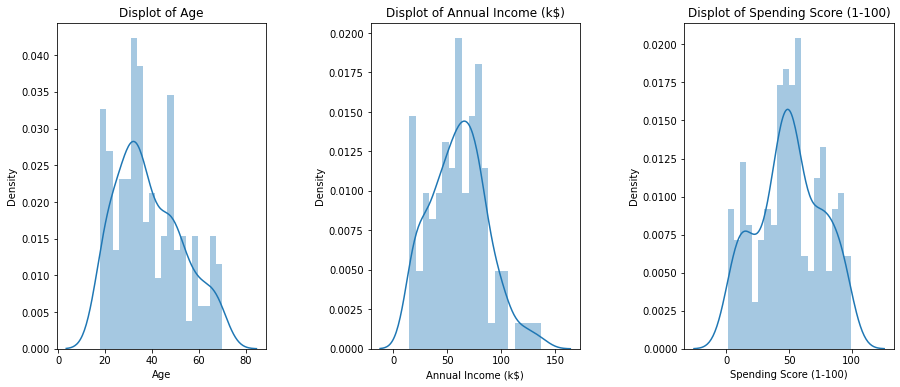

In [ ]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', "Annual Income (k$)", "Spending Score (1-100)"]:
  n += 1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(df[x], bins=20)
  plt.title('Displot of {}'.format(x))

plt.show() 

<function matplotlib.pyplot.show>

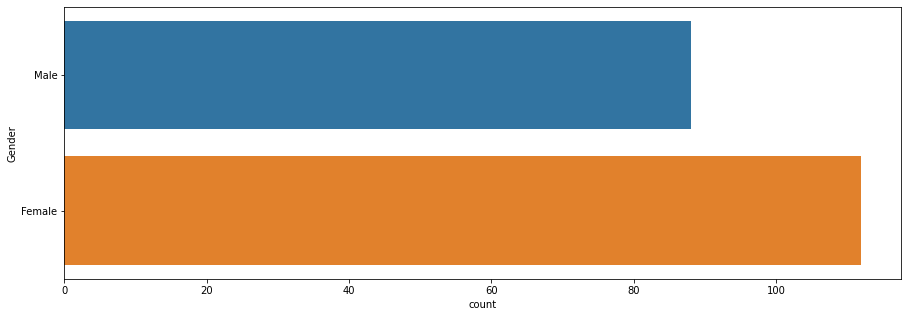

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=df)
plt.show

This viz informs us that we have more females as our customers.

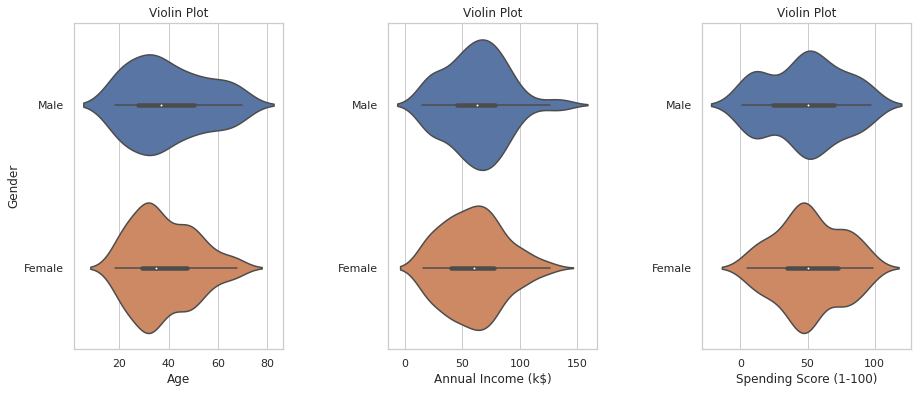

In [ ]:
plt.figure(1, figsize=(15,6))
n=0
for cols in ['Age', "Annual Income (k$)", "Spending Score (1-100)"]:
  n += 1
  plt.subplot(1,3,n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.violinplot(x= cols, y='Gender', data=df)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Violin Plot')

plt.show() 

More of our customers are female and falls in the age range of 20-40. More men earn more than their female counterparts while females have more Spending Score than their male counterpart

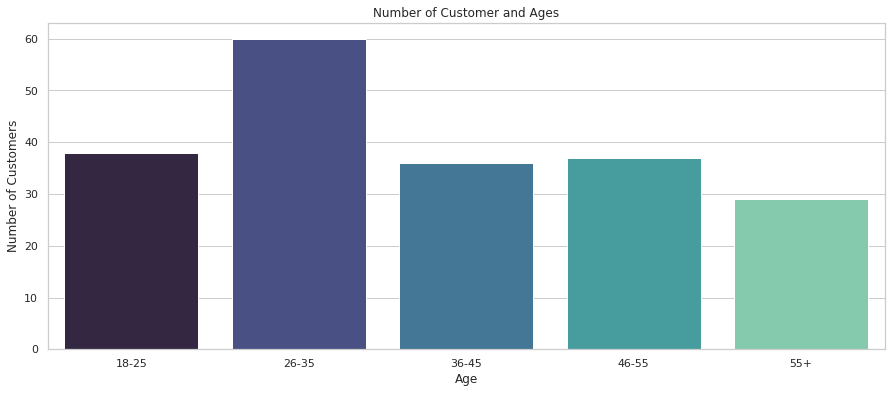

In [ ]:
age_18_25= df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35= df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45= df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55= df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above= df.Age[(df.Age >= 56)]

agex= ["18-25", '26-35', '36-45', '46-55', '55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette='mako')
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()



Most of our customers are in the age range of 26-35, with the least being 55-70


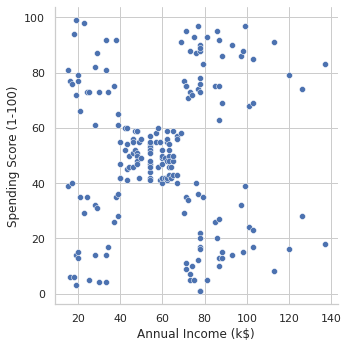

In [ ]:
sns.relplot(x="Annual Income (k$)", y='Spending Score (1-100)', data=df)

We see a correlation in the range of 40-50 in Annual Income and that of Spending Score 40 -60 also.

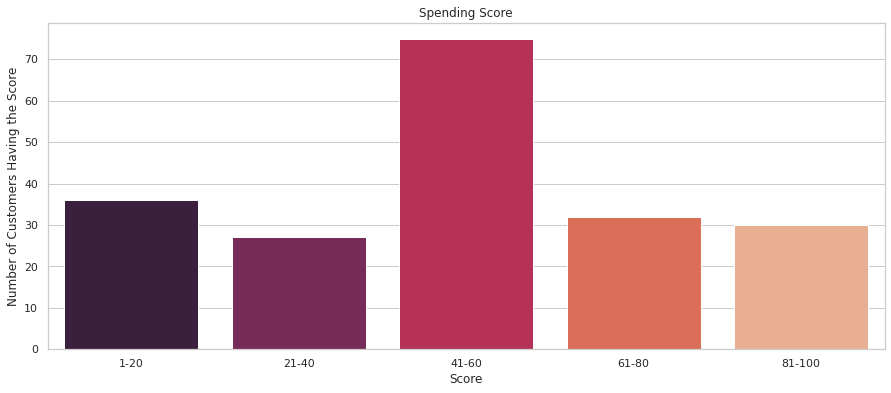

In [ ]:
ss_1_20= df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40= df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60= df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80= df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100= df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

ssx= ["1-20", '21-40', '41-60', '61-80', '81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]


plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette='rocket')
plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel("Number of Customers Having the Score")
plt.show()



from the visualization we can notice that most customers have the spending score of 41-60 and the least is 21-40.

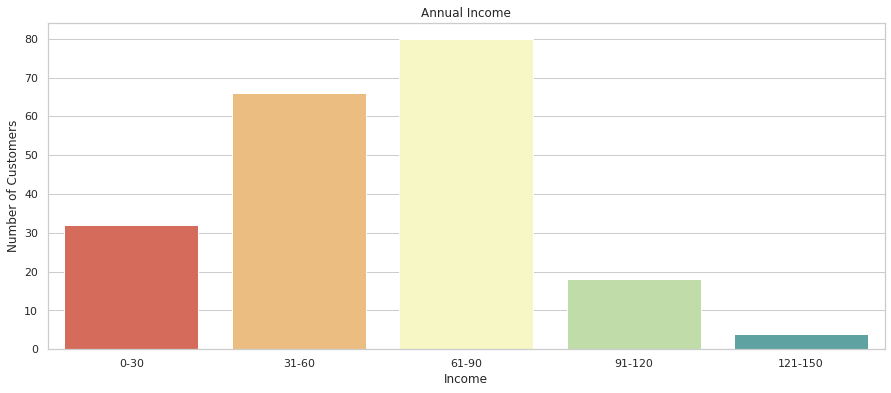

In [ ]:
ai0_30= df['Annual Income (k$)'][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60= df['Annual Income (k$)'][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90= df['Annual Income (k$)'][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120= df['Annual Income (k$)'][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150= df['Annual Income (k$)'][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]


aix= ["0-30", '31-60', '61-90', '91-120', '121-150']
aiy = [len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette='Spectral')
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()


from the visulization we notice that most customers earn in the range of $60001- $90000.

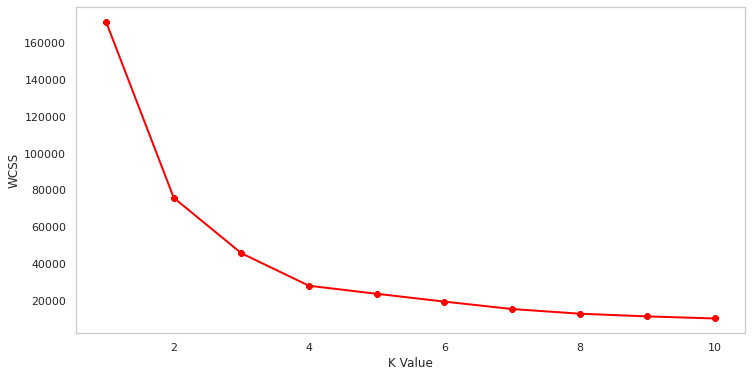

In [ ]:
# modelling the data with the variables Age and Spending Score
X1 = df.loc[:, ["Age", 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss= []


for k in range (1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [ ]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


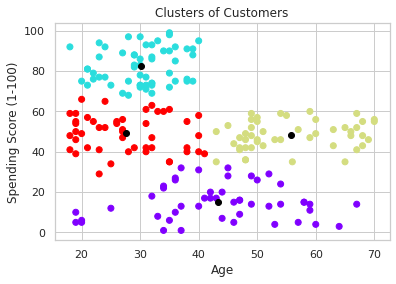

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Clusters of Customers")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

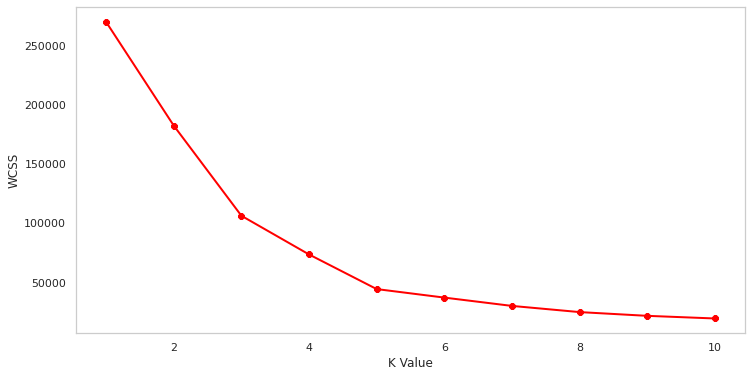

In [ ]:
# modelling with the variables Annual Income and Spending Score
X2 = df.loc[:, ["Annual Income (k$)", 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss= []


for k in range (1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [ ]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


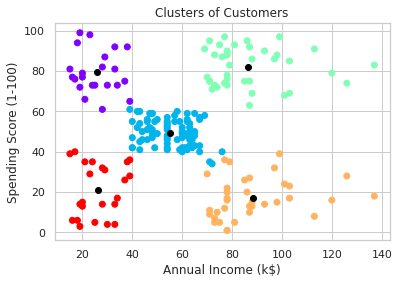

In [ ]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Clusters of Customers")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

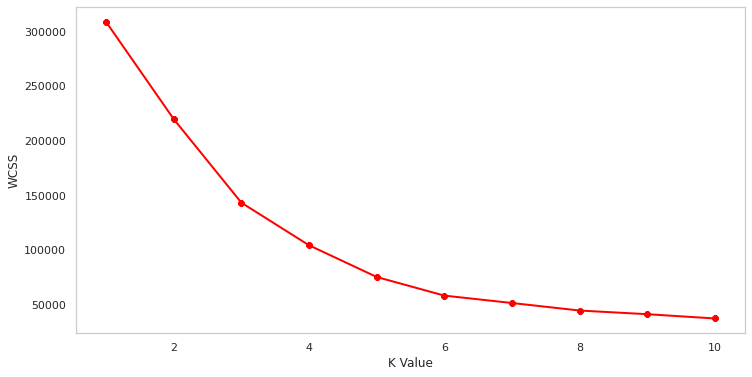

In [ ]:
# considering the variables Age, Annual Income and Spending score 
X3= df.iloc[:,1:]
wcss= []

# the k value for the three variables
for k in range (1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)
  
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X3)
print(label)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 4 2 3 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 3 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [ ]:
# centroid of the three variables
print(kmeans.cluster_centers_)

[[25.52173913 26.30434783 78.56521739]
 [45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]]


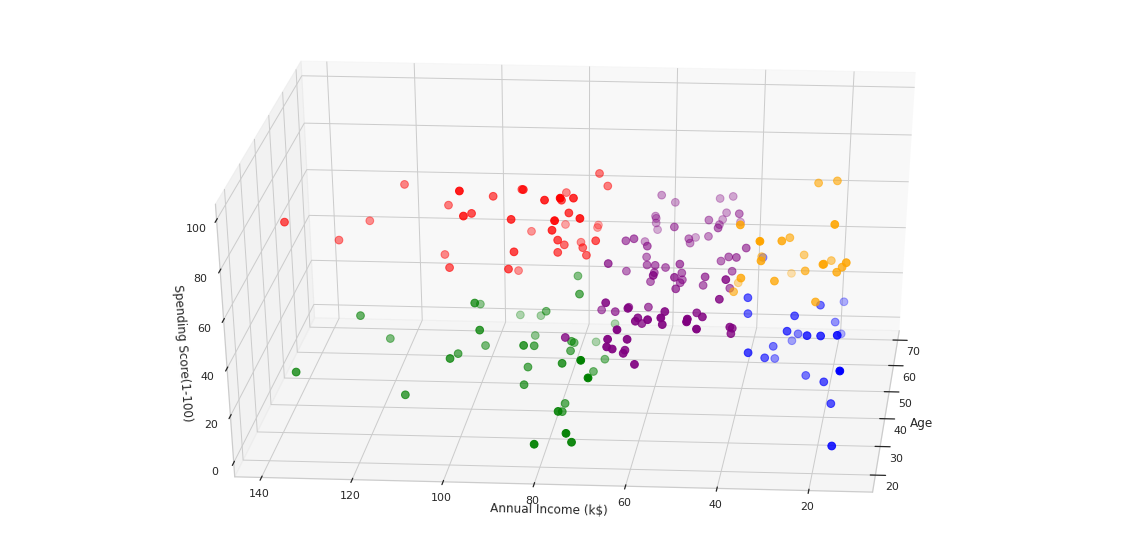

In [ ]:
clusters= kmeans.fit_predict(X3)
df["label"]= clusters
# use 3D to visualize the three variables
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df['Annual Income (k$)'][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c= 'blue', s=60)
ax.scatter(df.Age[df.label == 1], df['Annual Income (k$)'][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c= 'red', s=60)
ax.scatter(df.Age[df.label == 2], df['Annual Income (k$)'][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c= 'green', s=60)
ax.scatter(df.Age[df.label == 3], df['Annual Income (k$)'][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c= 'orange', s=60)
ax.scatter(df.Age[df.label == 4], df['Annual Income (k$)'][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c= 'purple', s=60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score(1-100)")

plt.show()